**Step 1: Importing The Required Libraries**

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

**Step 2: Importing Dataset And Spilitting**

Training images: (50000, 32, 32, 3)
Testing images: (10000, 32, 32, 3)


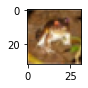

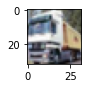

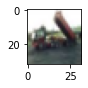

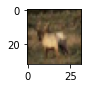

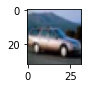

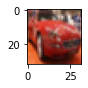

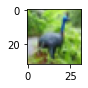

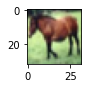

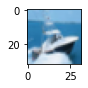

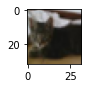

In [ ]:
#Loading and spilitting the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#Displaying the shapes of the training and testing images
print("Training images: {}".format(x_train.shape))
print("Testing images: {}".format(x_test.shape))

#Visualizing the training images
for i in range(10):
  plt.subplots(figsize=(1,1))
  img = x_train[i]
  plt.imshow(img)

**Step 3:  Pre-processing And Normalizing**

In [ ]:
#Reshaping the data
X_train = x_train.reshape(x_train.shape[0],32,32,3)
X_test = x_test.reshape(x_test.shape[0],32,32,3)

#Normalizing
X_test = X_test.astype('float32')
X_train = X_train.astype('float32')
X_test/=255
X_train/=255

One Hot Encoding

In [ ]:
n_classes = 10
print("Before one hot encoding: {}".format(y_train[10]))
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("After one hot encoding: {}".format(Y_train[10]))

Before one hot encoding: [4]
After one hot encoding: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


**Step 4: Importing And Adding Layers**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
model = Sequential()

#Input Layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)))

#Convolutional Layers
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Hidden Layers
model.add(Dense(250, activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(500, activation="relu"))
model.add(Dropout(0.3))

#Output Layer
model.add(Dense(10, activation="softmax"))

**Step 4: Compiling And Training The Model**

In [ ]:
#Compiling
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Training
model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
391/391 [==============================] - 544s 1s/step - loss: 1.6180 - accuracy: 0.4052 - val_loss: 1.1833 - val_accuracy: 0.5761
Epoch 2/5
391/391 [==============================] - 543s 1s/step - loss: 1.1689 - accuracy: 0.5834 - val_loss: 0.9526 - val_accuracy: 0.6725
Epoch 3/5
391/391 [==============================] - 539s 1s/step - loss: 0.9810 - accuracy: 0.6552 - val_loss: 0.8279 - val_accuracy: 0.7132
Epoch 4/5
391/391 [==============================] - 539s 1s/step - loss: 0.8749 - accuracy: 0.6929 - val_loss: 0.8021 - val_accuracy: 0.7252
Epoch 5/5
391/391 [==============================] - 535s 1s/step - loss: 0.7926 - accuracy: 0.7237 - val_loss: 0.7554 - val_accuracy: 0.7343


**Step 6: Predicting And Object Detection**

In [ ]:
classes = range(0,10)
names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'ship', 'truck']

#Zipping the classes and the names to create a dictionary of class labels
class_labels = dict(zip(classes, names))

#Generating a batch of 10 testing images for predicting
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109], axis=1)

#Using the predict function to predict for the 10 images
predictions = model.predict(batch, verbose=1)
 
#Displaying the predictions
class_result = np.argmax(predictions, axis=1)
print(class_result)

1/1 [==============================] - 0s 63ms/step
[4 3 6 3 1 1 3 6 8]


Final Object Detection

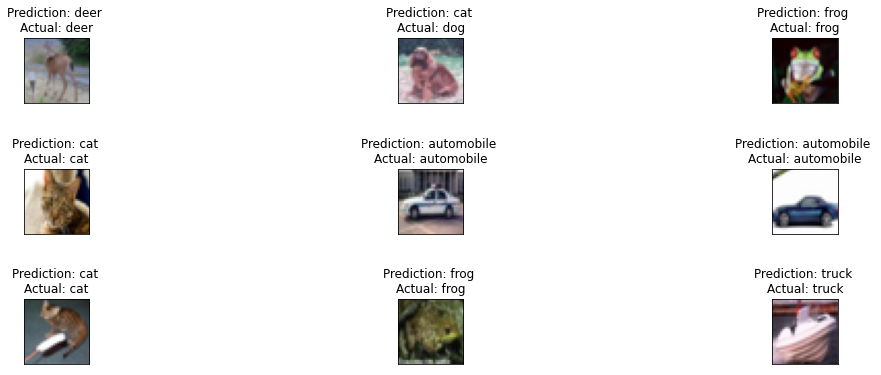

In [ ]:
fig, axs = plt.subplots(3,3, figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs = axs.flatten()

for i, img  in enumerate(batch):
  for key, value in class_labels.items():
    if(class_result[i]==key):
      axs[i].axes.set_title("Prediction: {} \nActual: {}".format(class_labels[key], class_labels[labels[i]]))
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
  axs[i].imshow(img)
plt.show()